# Predicting heart disease using machine learning
this notebook looks into various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not  someone as heart disease based on their medical attributes.

were going to take the following approach :
1. Problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation

## 2. data 
the original data came from the cleavland data from the UCI machine learning repository.
https://archive.ics.uci.edu/dataset/45/heart+disease
there is a version of it on kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3.Evaluation
> if we can reach 95% accuracy, then we will pursue the project.

## 4.Features
**create data dictionary**

this is where u get diff info about each of the features in your data.

## preparing the tools

In [112]:
# importing all the tools we need
#regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#as we want the plots to appear inside the notebook

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve , auc

## load data

In [115]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)



(303, 14)

## data exploration (explore data analysis or EDA)

the goal  is to explore more about the data and become a subject matter export
1. what question  are you trying to solve ?
2. what kind of data do we have and how do you deal with it?
3. whats missing from the data and how do u deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change, remove features to get more out of your data?

In [118]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [122]:
# lets find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

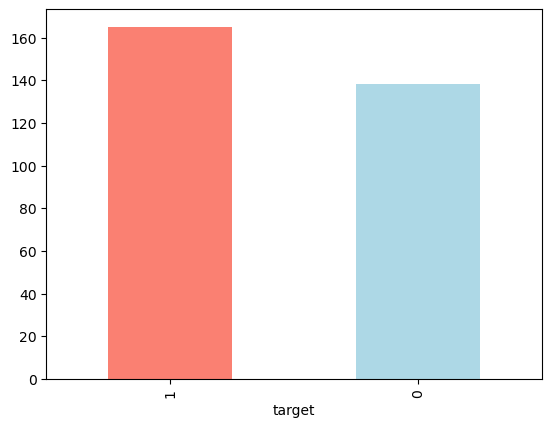

In [124]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [128]:
#is there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [130]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to sex

In [133]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [135]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


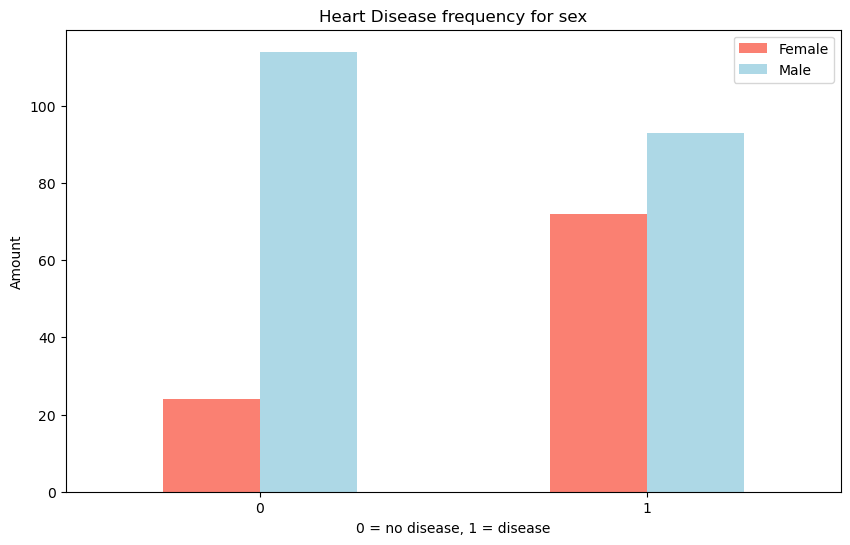

In [137]:
# cretae a plot o cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);
plt.show()

## age vs max heart rate for heart disease 

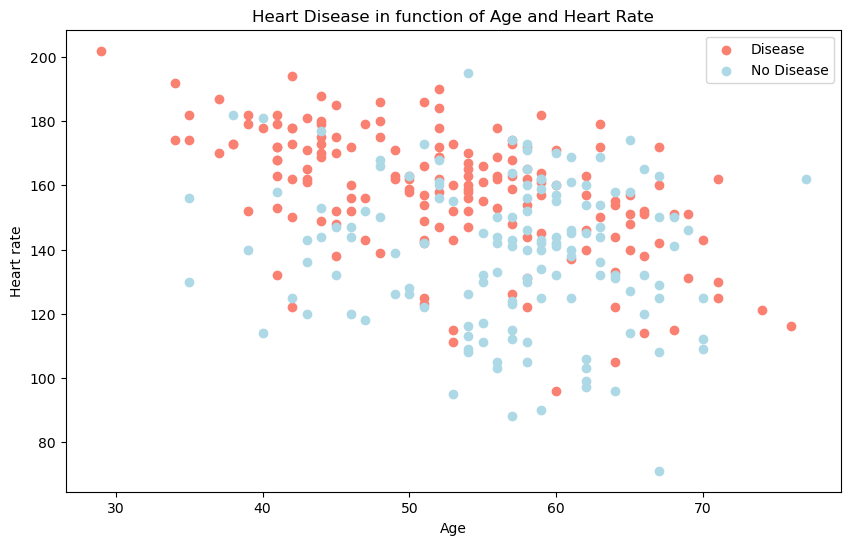

In [140]:
# create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# add some helpful info
plt.title("Heart Disease in function of Age and Heart Rate")
plt.ylabel("Heart rate")
plt.xlabel("Age")
plt.legend(["Disease","No Disease"]);
plt.show()

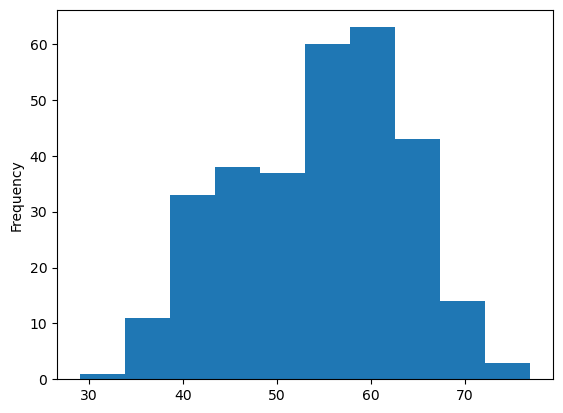

In [142]:
# check the distribution of the age column with a histogram
df.age.plot.hist()
plt.show()

## heart disease freqeuncy per chest pain type 

3. cp - chest pain type
• 0: Typical angina: chest pain related decrease blood supply to the heart
• 1: Atypical angina: chest pain not related to heart
• 2: Non-anginal pain: typically esophageal spasms (non heart related)
• 3: Asymptomatic: chest pain not showing signs of disease

In [145]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


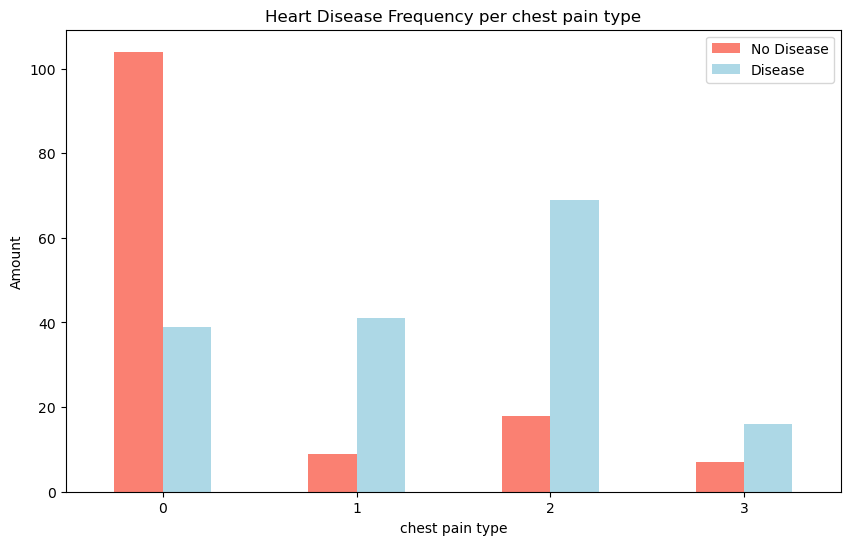

In [147]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
# add some communication
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);
plt.show()

In [149]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [151]:
# make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


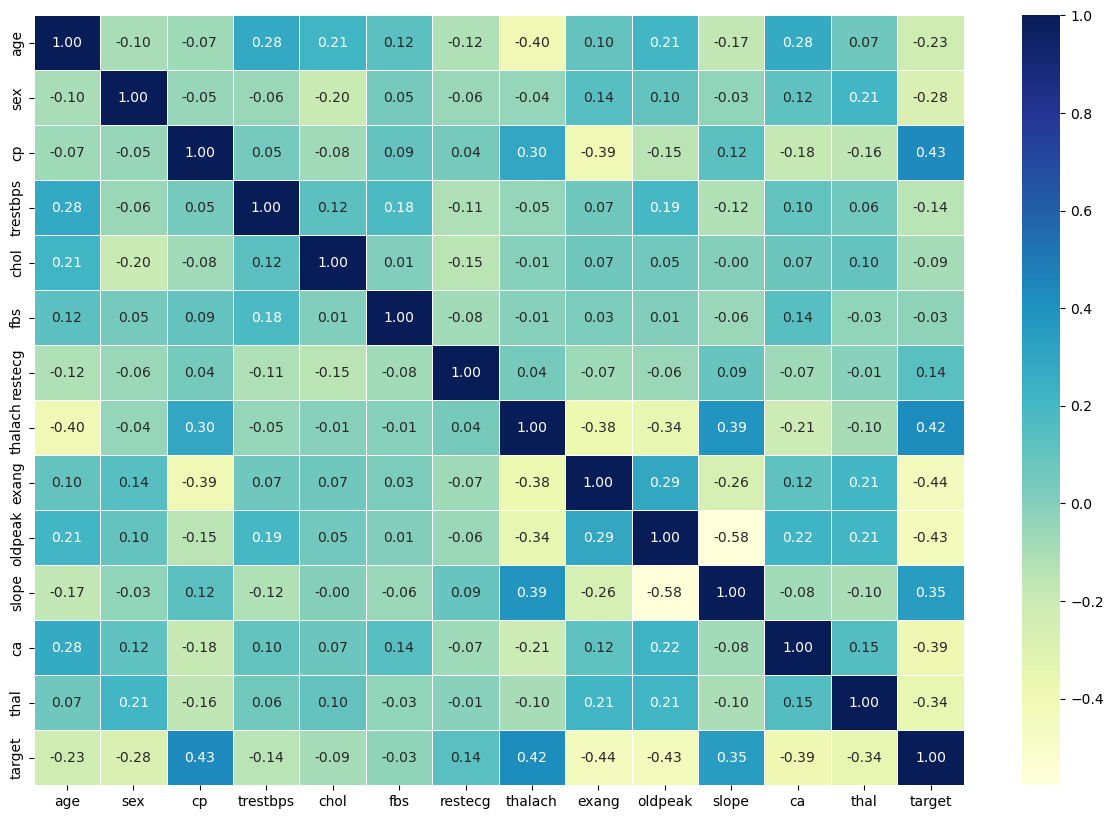

In [153]:
#lets make corr matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.show()

## 5. Modelling

In [156]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
# split data into x and y
X = df.drop("target", axis=1)

Y = df["target"]

In [160]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [162]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [164]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test,Y_train,Y_test = train_test_split(X,
                                                  Y,
                                                  test_size=0.2)

In [166]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [168]:
Y_train, len(Y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

now we have got our data split into training and test sets, its time to build a machine learning model.
we will train it (find the patterns) on the training set.
and we will test it (use the patterns) on the test set.

we are going to try 3 different machine learning models:
1. logistic regression
2. K-Nearest Neighbours Classifiers
3. Random Forest Classifier

In [171]:
#put model in a dictionary
models = {"KNN" : KNeighborsClassifier(),
          "Logistic Regression" : LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# creating a function to fit and score models
def fit_and_score(models, X_train, X_test,Y_train, Y_test):
    """
    fit and evalutes given machine learning models.
    models : a dict of different Scikit-Learn Machine Learning Models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    Y_train : training labels 
    Y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #make a dicionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(X_test, Y_test)
    return model_scores  # Return statement moved outside the loop

In [173]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Model Comparison 

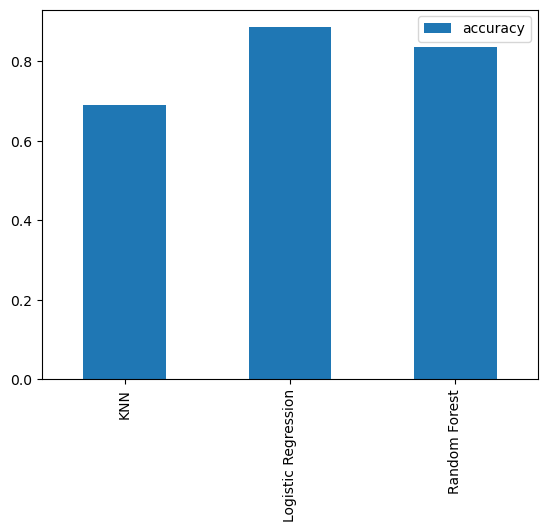

In [176]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()


Now weve got a baseline model.. models first predictions arent alwayys that what we should  based our next steps off.
what should do?
Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)
# Hyperparameter Tuning

In [179]:
# tuning the KNN

train_scores=[]
test_scores=[]

# Create a listt of different valus for n_Neighbors
neighbors=range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_Neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

## Fit the algorithm
    knn.fit(X_train,Y_train)

#Update the training scores list 
    train_scores.append(knn.score(X_train,Y_train))

#Update the training scores list
    test_scores.append(knn.score(X_test,Y_test))

In [181]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [183]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


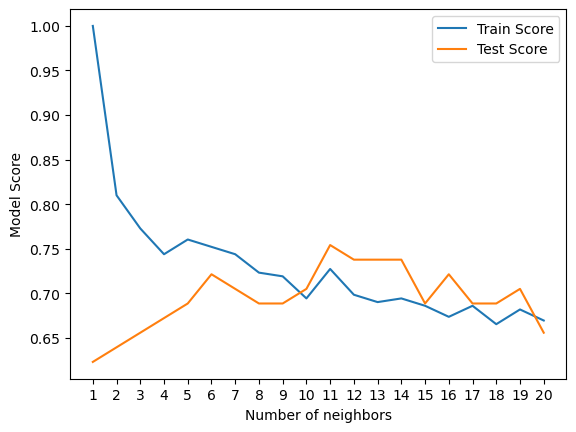

In [185]:
plt.plot(neighbors, train_scores,label="Train Score")
plt.plot(neighbors, test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
plt.show()

##Even after hypertuning KNN does not show results even close to other models
therefore we we not use KNN now and disclose it

## hypertuning tuning with RandomizedSearchCV
we are going to tune :
Randomforestclassifier
logistic regression
using randomizedsearchCV

In [189]:
# Create a hyperparameter grod for Logistic Regression 
log_reg_grid = {"C": np.logspace(-4,4,20), #this is the best value for logistic regression model tuning
                "solver":["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

now we have got hyperparameters grids setup for each of our models, lets tune them using RandomizedSearchCV..

In [192]:
# Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,Y_train)
                    

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [194]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

now we have tuned LogisticRegression(), lets do the same for RandomForestClassifier()..

In [197]:
#setup random seed 
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV (RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)
#fit random hyperparameters search model for RandomForestClassifier()
rs_rf.fit(X_train,Y_train)
                    

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [201]:
# find the best params
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [202]:
# Evaluate the randomized search  RandomForestClassifier model
rs_rf.score(X_test,Y_test)

0.8688524590163934

## Still Logistic Regression is better even after tuning the Random Forest

## Hyperparameter Tuning with GridSearchCV
since our logistic regresson model is better, therefore we will try and improve them again using GridSearchCV

In [208]:
 # Different hyperparameters for our LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

#setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [210]:
# Check the est hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [212]:
#Evaluating the grid search LogisticRegression Model
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Evaluatin our tunned machine learning classifier, beyond accuracy
• ROC curve and AUC score
• Confusion matrix
• Classification report
• Precision
• Recall
• F1-score
... and it would be great if cross-validation was used where possible.
to make comparisons and evaluate our trained model, first we need to make predictions.

In [215]:
# Make predictions with tuned models
y_preds = gs_log_reg.predict(X_test)

In [217]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [219]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

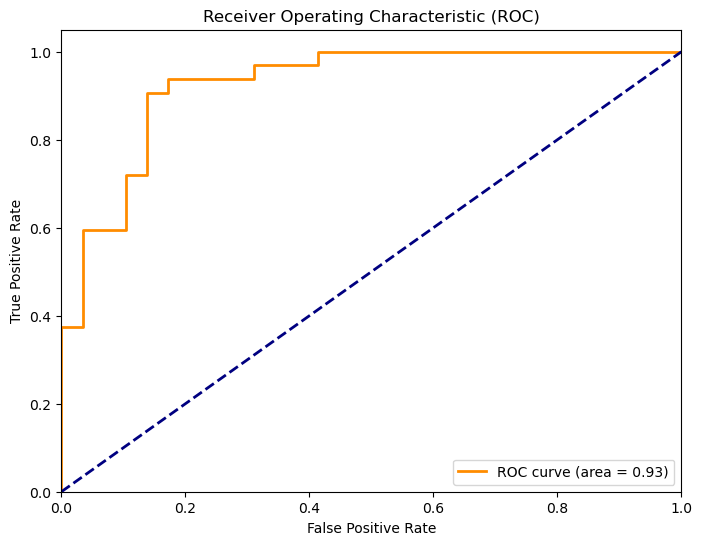

In [223]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_proba = gs_log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [225]:
# confusion matrix
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


In [227]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(Y_test,y_preds)

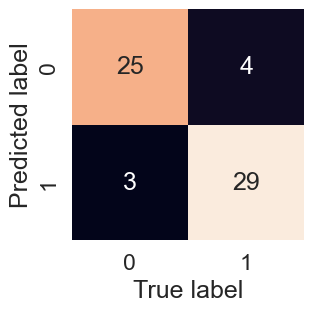

In [229]:
plt.show()

now we have got a ROC curve, an AUC metric and a confusion matrix, lets get a classification repoprt as well as cross-validated precision, recall and f1_score

we got our ROC curve, an auc metric and  a confusion matrix,
lets get a classification report as well as cross validated precision, recall and f1-score

In [233]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# this classification  report is for normal train and test split data
we need to find it for cross-validation 
we will use cross_val_score()

In [236]:
# checking the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [238]:
# creating a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver="liblinear")

In [240]:
#cross - validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [242]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [244]:
# cross-validated precision
cv_prec = cross_val_score(clf,
                          X,
                          Y,
                          cv=5,
                          scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [246]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                          X,
                          Y,
                          cv=5,
                          scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [248]:
# cross validated f1_score
cv_f1 = cross_val_score(clf,
                          X,
                          Y,
                          cv=5,
                          scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [250]:
# Visualise our cross validation matrics
cv_metrices = pd.DataFrame({"Accuracy":cv_acc,
                            "Precision":cv_prec,
                            "recall":cv_recall,
                            "f1":cv_f1},
                           index=[0])
cv_metrices.T.plot.bar(title="Cross-validated classification matrics",
                      legend=False)

<Axes: title={'center': 'Cross-validated classification matrics'}>

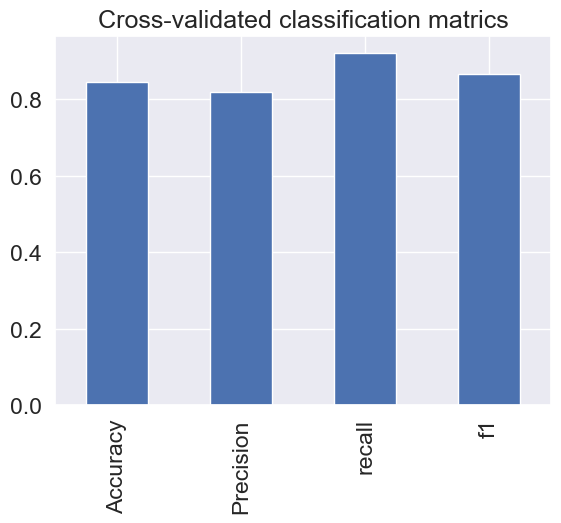

In [252]:
plt.show()

### Feature importance
feature important is another as asking, "which features contributed mos to the outcomes of the modeland how did they contribute?


In [255]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [259]:
# fit an instance of Logisticregression 
clf = LogisticRegression (C=0.20433597178569418,
                          solver = "liblinear")

clf.fit(X_train,Y_train);

In [261]:
# check coeff_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [263]:
## Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

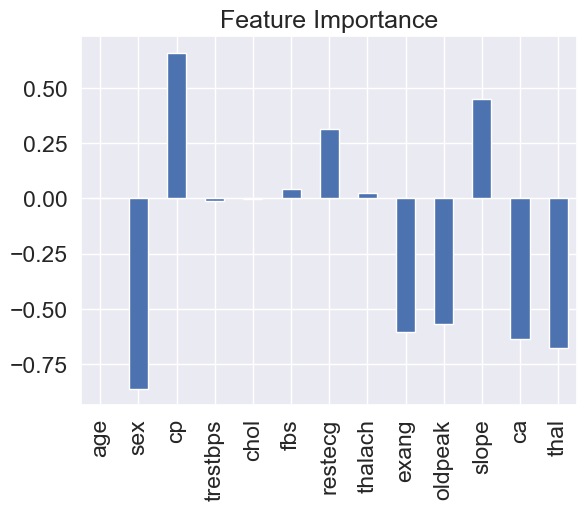

In [265]:
#visualize feature feature important
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show()

In [267]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [271]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation
If you havnt hit your evaluation metric yet.. ask yourself...

* could I collect more data?
* could you try a better model? like catboost or XGBoost?
could you improve the current models? (beyond what weve done so far)
* if your model  is good enough how would you export it and share it with others?